In [1]:
import pandas as pd
Infy=pd.read_csv("infy_stock.csv",sep=",") #reading Credit.csv file
Infy.head() #Looking into top 5 rows

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
Infy.shape #Checking the shape of our data

(248, 15)

In [4]:
Infy.dtypes #Checking the datatype of each attribute

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

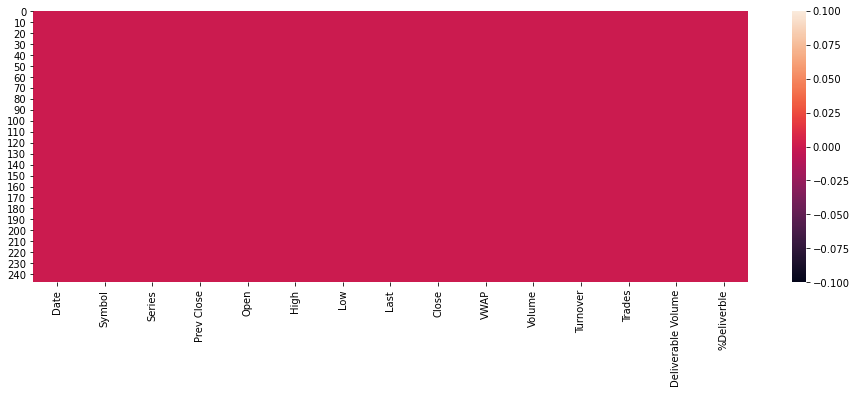

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16,5))
sns.heatmap(Infy.isnull()) #Looking for null values if any, in heatmap

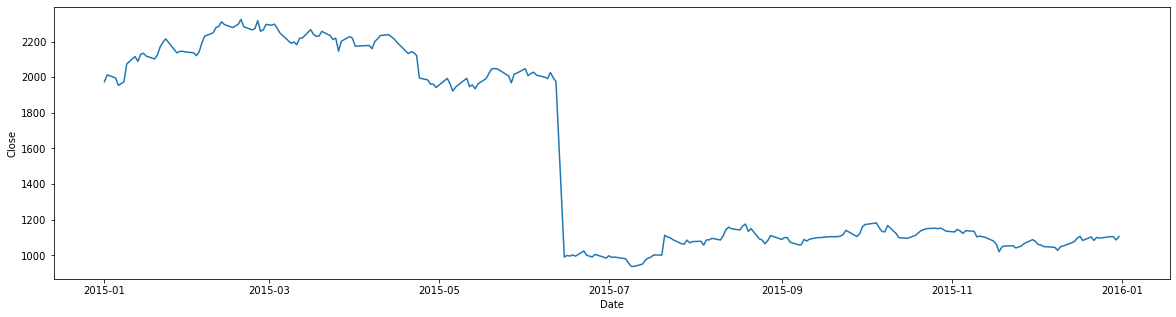

In [6]:
Infy['Date'] = pd.to_datetime(Infy['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="Close",  data=Infy)
plt.show()

In [10]:
Infy.dtypes #Checking the datatype of each attribute

Date                  datetime64[ns]
Symbol                         int32
Series                         int32
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                         int64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [11]:
#Converting date into numeric form
import datetime as dt
Infy['Date'] = pd.to_datetime(Infy['Date'])
Infy['Date'] = Infy['Date'].map(dt.datetime.toordinal)
Infy.head() #Checking top 5 rows of dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,735599,0,0,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,735600,0,0,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,735603,0,0,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,735604,0,0,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,735605,0,0,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [8]:
#Label encoding for the object columns
label_list=list(Infy.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #Initlize LabelEncoder to le 
for i in label_list:
    Infy[i] = le.fit_transform(Infy[i])

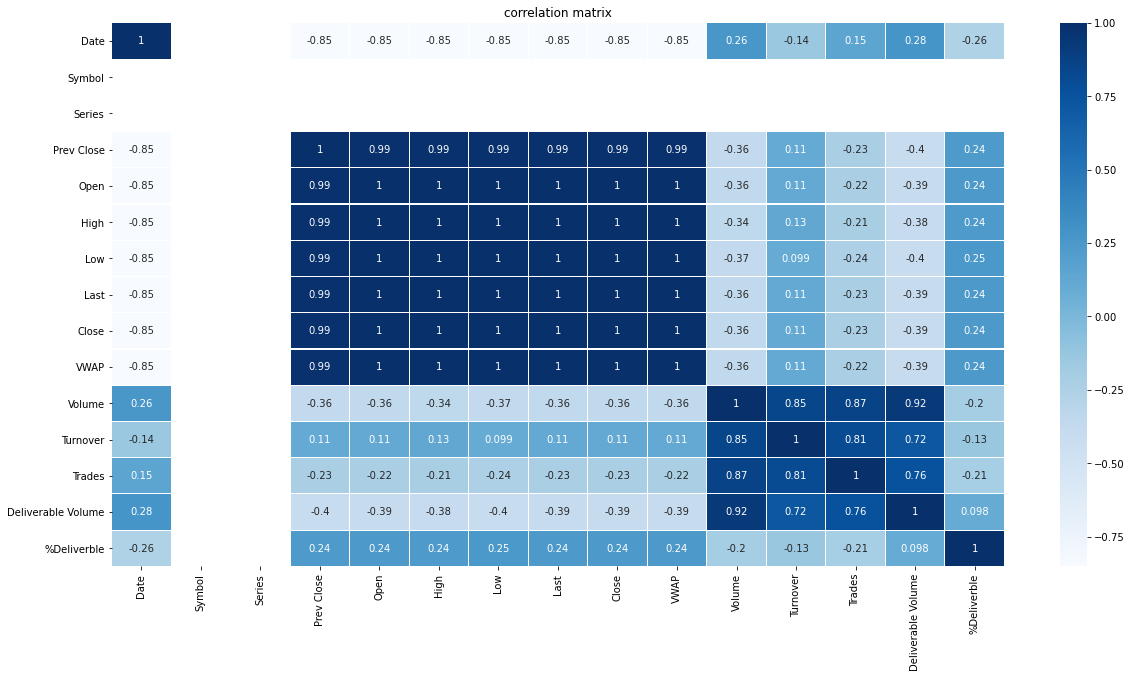

In [12]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Infy.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

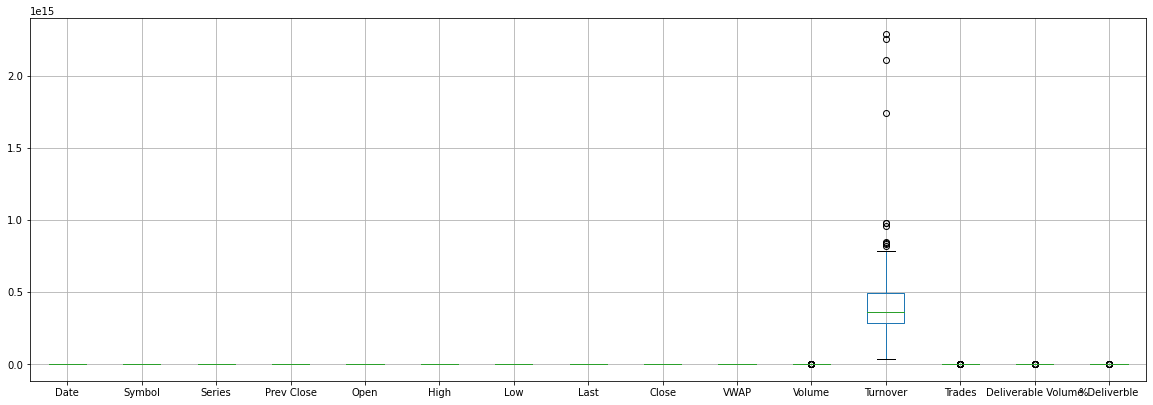

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
Infy.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

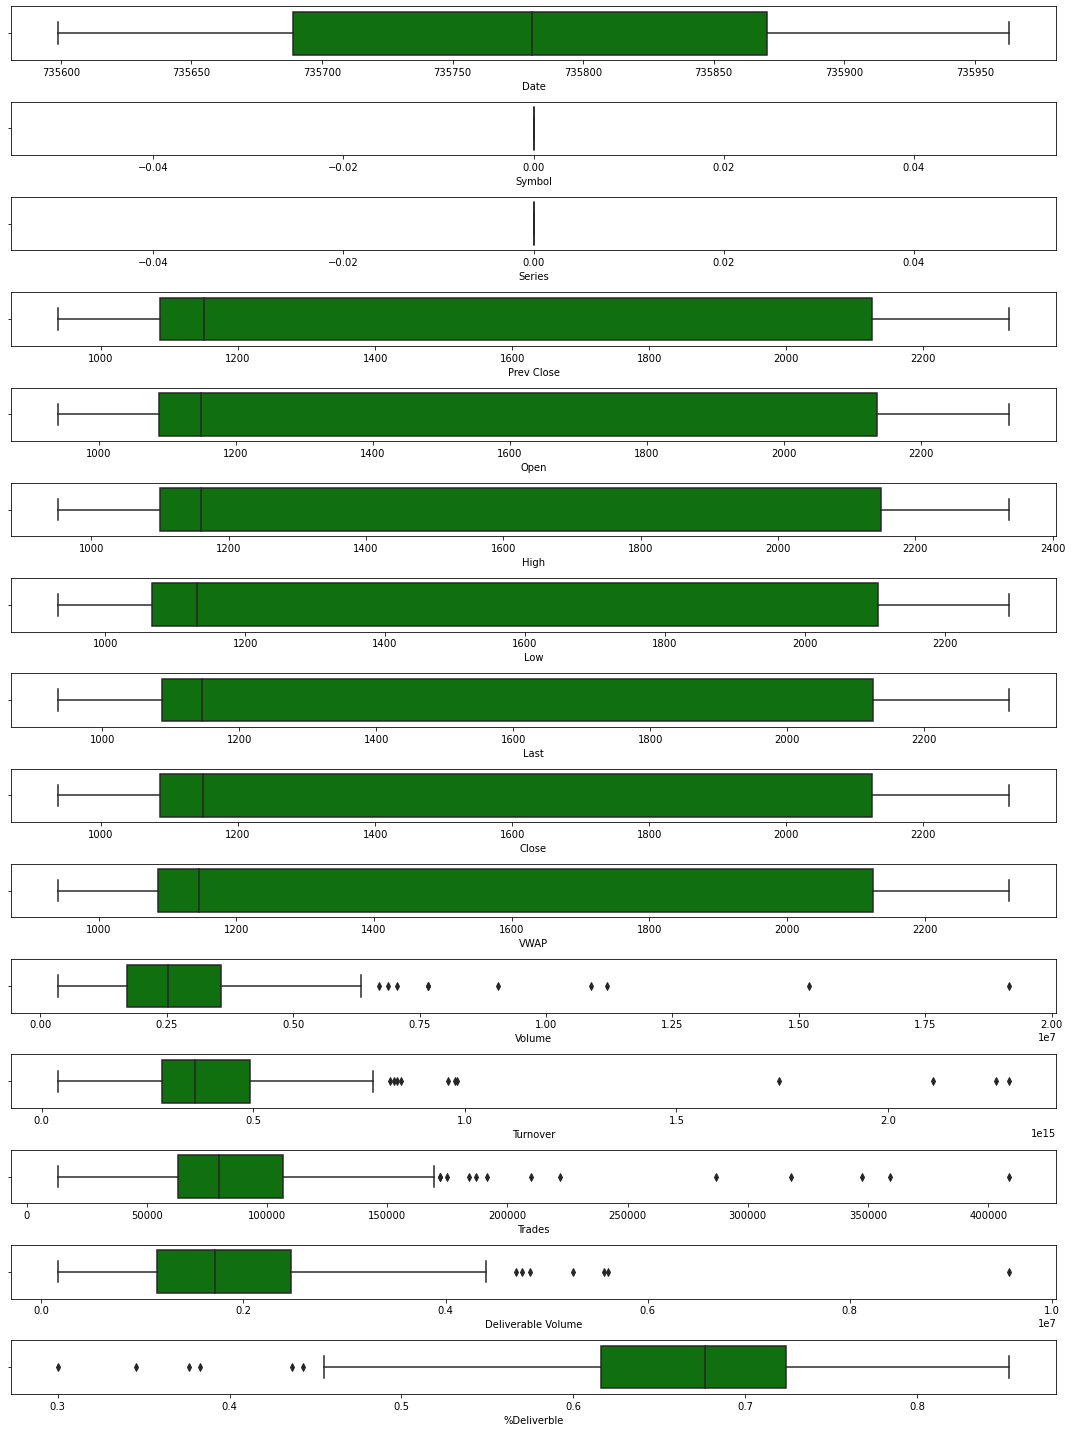

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
collist=Infy.columns.values
ncol=1
nrows=15
plt.figure(figsize=(15*ncol,20*ncol))
for i in range(0,len(collist)):
    if Infy[collist[i]].dtype != "object":
        plt.subplot(nrows,ncol,i+1)
        sns.boxplot(Infy[collist[i]],color='green',orient='v')
        plt.tight_layout()

In [26]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Infy))
print(np.where(z>3))

(array([  6,   6,   6,   6,  40,  76,  76,  76,  76, 137, 137, 137, 137,
       164, 193, 193, 193, 193, 194, 225], dtype=int64), array([10, 11, 12, 14, 14, 10, 11, 12, 14, 10, 11, 12, 13, 13, 10, 11, 12,
       14, 12, 13], dtype=int64))


In [27]:
z=np.abs(zscore(Infy))
threshold=3
new_Infy=Infy[(z<3).all(axis=1)]
print(Infy.shape)
print(new_Infy.shape)

(248, 15)
(0, 15)


In [28]:
#Can't drop the ottliers